In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


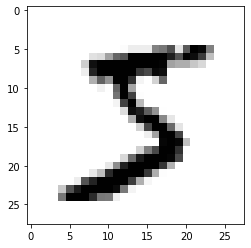

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [6]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2627 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0405 - accuracy: 0.9866


In [11]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9751
0.08901664614677429 0.9750999808311462


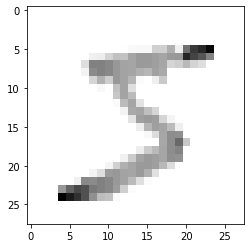

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#import matplotlib.pyplot as plt
#plt.imshow(x_train[0],cmap = plt.cm.binary)
#plt.show()
#print(x_train[0])

In [13]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [14]:
print(predictions)

[[5.0207213e-11 2.9428159e-08 3.2901025e-07 ... 9.9998331e-01
  1.8200602e-08 5.7095133e-07]
 [1.7356800e-11 1.8995248e-05 9.9997890e-01 ... 1.0004093e-09
  2.8087438e-08 1.1582372e-13]
 [1.0316239e-07 9.9941874e-01 1.5829424e-05 ... 3.7444079e-05
  5.1886530e-04 1.2134253e-06]
 ...
 [1.6599320e-12 4.8928817e-09 1.1549254e-11 ... 7.7915182e-08
  8.0934290e-09 1.5135810e-06]
 [6.3430228e-08 2.2159921e-09 2.0288605e-08 ... 2.1567378e-07
  2.1096433e-03 1.6923972e-09]
 [5.8141616e-09 1.1912818e-10 6.4298461e-10 ... 9.2760576e-13
  2.1472788e-08 8.8145021e-12]]


In [15]:
import numpy as np
print(np.argmax(predictions[0]))

7


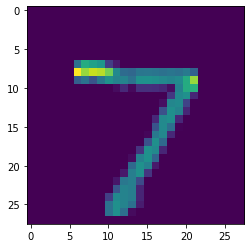

In [16]:
plt.imshow(x_test[0])